<a href="https://colab.research.google.com/github/RUMONMD89/Data-Science/blob/main/DS6%20Visualization%20and%20Uniform%20Random%20Numbers%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4.2 データの可視化(Data visualization)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
iris = sm.datasets.get_rdataset('iris', 'datasets').data
iris.head()
#>    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
#> 0           5.1          3.5           1.4          0.2  setosa
#> 1           4.9          3.0           1.4          0.2  setosa
#> 2           4.7          3.2           1.3          0.2  setosa
#> 3           4.6          3.1           1.5          0.2  setosa
#> 4           5.0          3.6           1.4          0.2  setosa

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 4.2.1 ヒストグラム(Histogram)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8523f4cd0>]],
      dtype=object)

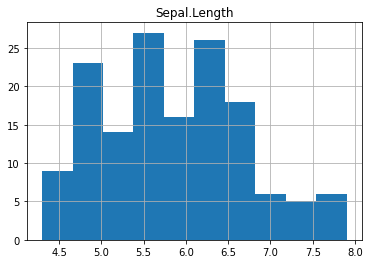

In [2]:
iris.hist('Sepal.Length')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8522ca090>]],
      dtype=object)

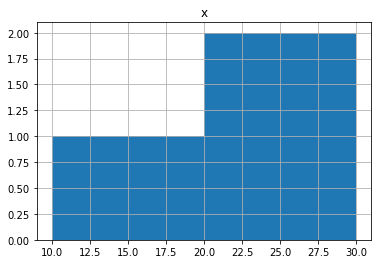

In [3]:
my_df = pd.DataFrame(
    {'x': [10, 20, 30]})
my_df.hist('x', bins=2) # 階級数は2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff851d8cfd0>]],
      dtype=object)

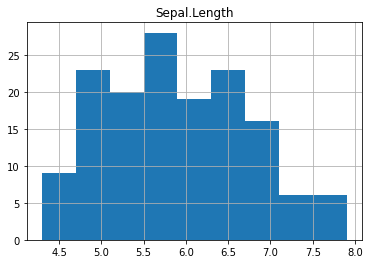

In [4]:
x = iris['Sepal.Length']
tmp = np.linspace(min(x), max(x), 10)
iris.hist('Sepal.Length',
          bins=tmp.round(2))

### 4.2.2 散布図(Scatter plot)

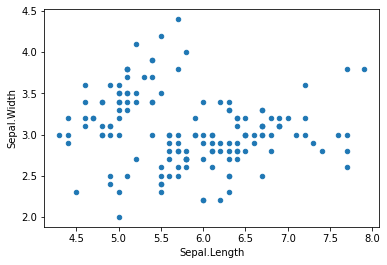

In [5]:
iris.plot('Sepal.Length',
          'Sepal.Width',
          kind='scatter')

### 4.2.3 (boxplot)

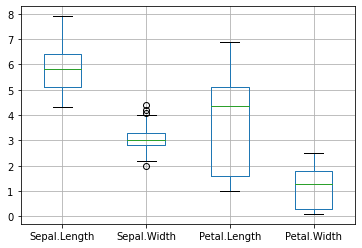

In [6]:
iris.boxplot()

### 4.2.4 棒グラフとエラーバー(bar graph and error bars)

In [7]:
pd.options.display.float_format = (
    '{:.2f}'.format)
my_df = (iris.describe().transpose()
    [['mean', 'std']])
my_df['se'] = (my_df['std'] /
               len(iris)**0.5)
my_df
#>               mean  std   se
#> Sepal.Length  5.84 0.83 0.07
#> Sepal.Width   3.06 0.44 0.04
#> Petal.Length  3.76 1.77 0.14
#> Petal.Width   1.20 0.76 0.06

,mean,std,se
Sepal.Length,5.84,0.83,0.07
Sepal.Width,3.06,0.44,0.04
Petal.Length,3.76,1.77,0.14
Petal.Width,1.20,0.76,0.06


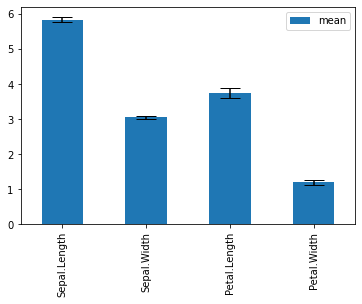

In [8]:
my_df.plot(y='mean', kind='bar', yerr='se', capsize=10)

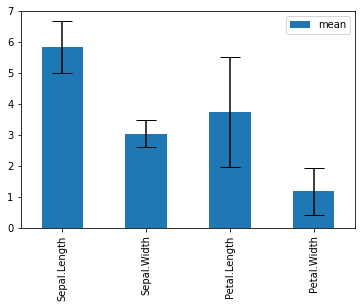

In [9]:
my_df.plot(y='mean', kind='bar', yerr='std', capsize=10)

In [10]:
my_group = iris.groupby('Species')                    # 品種ごとに，
my_df = my_group.agg('mean')                          # 各変数の，平均と
my_std = my_group.agg('std')
my_se = my_group.agg(lambda x: x.std() / len(x)**0.5) # 標準誤差を求める．
my_se
#>             Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
#> Species
#> setosa              0.05         0.05          0.02         0.01
#> versicolor          0.07         0.04          0.07         0.03
#> virginica           0.09         0.05          0.08         0.04

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,0.05,0.05,0.02,0.01
versicolor,0.07,0.04,0.07,0.03
virginica,0.09,0.05,0.08,0.04


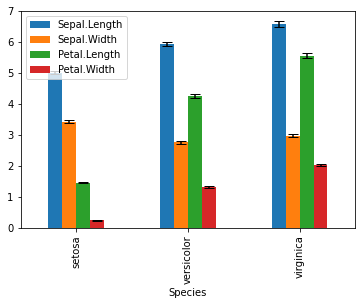

In [11]:
my_group.agg('mean').plot(kind='bar', yerr=my_se, capsize=5)

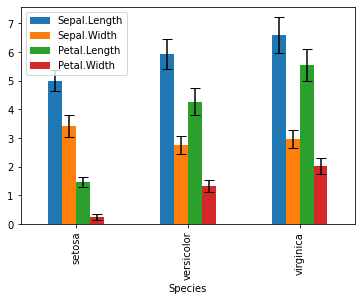

In [12]:
my_group.agg('mean').plot(kind='bar', yerr=my_std, capsize=5)

### 4.2.5 モザイクプロット(mosaic plot)

(<Figure size 432x288 with 3 Axes>,
 {('setosa', 'True'): (0.0, 0.0, 0.33003300330033003, 0.8372093023255813),
  ('setosa', 'False'): (0.0,
   0.8405315614617939,
   0.33003300330033003,
   0.159468438538206),
  ('versicolor', 'True'): (0.334983498349835,
   0.0,
   0.33003300330033003,
   0.15946843853820597),
  ('versicolor', 'False'): (0.334983498349835,
   0.1627906976744186,
   0.33003300330033003,
   0.8372093023255813),
  ('virginica', 'True'): (0.66996699669967,
   0.0,
   0.3300330033003301,
   0.3388704318936877),
  ('virginica', 'False'): (0.66996699669967,
   0.34219269102990035,
   0.3300330033003301,
   0.6578073089700995)})

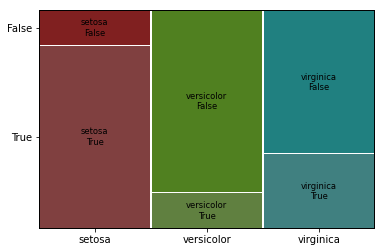

In [13]:
from statsmodels.graphics.mosaicplot \
    import mosaic

my_df = pd.DataFrame({
    'Species': iris.Species,
    'w_Sepal': iris['Sepal.Width'] > 3})

my_table = pd.crosstab( # 分割表
    my_df['Species'],
    my_df['w_Sepal'])
my_table
#> w_Sepal     False  True
#> Species
#> setosa          8     42
#> versicolor     42      8
#> virginica      33     17

mosaic(my_df,
       index=['Species', 'w_Sepal'])

(<Figure size 432x288 with 3 Axes>,
 {('setosa', 'True'): (0.0, 0.0, 0.33003300330033003, 0.8372093023255813),
  ('setosa', 'False'): (0.0,
   0.8405315614617939,
   0.33003300330033003,
   0.159468438538206),
  ('versicolor', 'True'): (0.334983498349835,
   0.0,
   0.33003300330033003,
   0.15946843853820597),
  ('versicolor', 'False'): (0.334983498349835,
   0.1627906976744186,
   0.33003300330033003,
   0.8372093023255813),
  ('virginica', 'True'): (0.66996699669967,
   0.0,
   0.3300330033003301,
   0.3388704318936877),
  ('virginica', 'False'): (0.66996699669967,
   0.34219269102990035,
   0.3300330033003301,
   0.6578073089700995)})

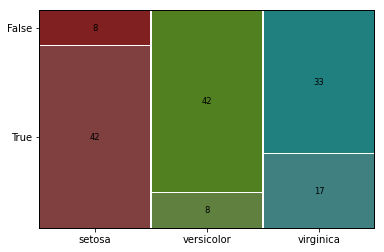

In [14]:
my_table.columns = [str(x) for x in my_table.columns]
my_table.index   = [str(x) for x in my_table.index]
mosaic(my_df, index=['Species', 'w_Sepal'], labelizer=lambda k: my_table.loc[k])

### 4.2.6 関数のグラフ(function graph)

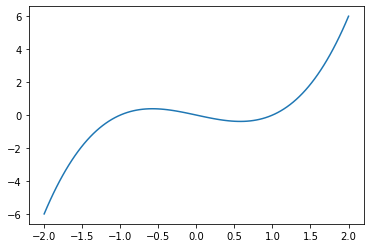

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2, 2, 100)
y = x**3 - x
plt.plot(x, y)

### 4.2.7 ggplot2 (R)

## 4.3 乱数(random number)

In [16]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng()

### 4.3.1 一様乱数（離散）(uniform random numbers (discrete))

(array([1644., 1695., 1645., 1665., 1721., 1630.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

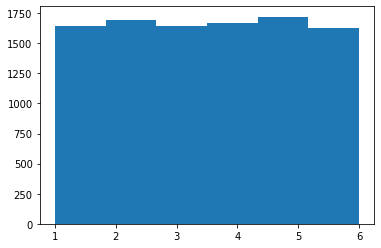

In [17]:
x = np.random.choice(
    a=range(1, 7), # 1から6
    size=10000,    # 乱数の数
    replace=True)  # 重複あり
# あるいは
x = np.random.randint(
# あるいは
#x = rng.integers(
    low=1,      # 最小
    high=7,     # 最大+1
    size=10000) # 乱数の数

plt.hist(x, bins=6) # ヒストグラム

### 4.3.2 一様乱数（連続）(uniform random numbers (continuous))

(array([ 88., 109., 117.,  93., 101.,  98., 100.,  94., 101.,  99.]),
 array([2.10581171e-04, 1.00161359e-01, 2.00112137e-01, 3.00062915e-01,
        4.00013692e-01, 4.99964470e-01, 5.99915248e-01, 6.99866026e-01,
        7.99816804e-01, 8.99767581e-01, 9.99718359e-01]),
 <a list of 10 Patch objects>)

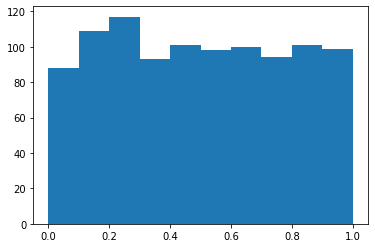

In [18]:
x = np.random.random(size=1000)
# あるいは
x = rng.random(size=10000)
# あるいは
x = np.random.uniform(
    low=0.0,     # 最小
    high=1.0,    # 最大
    size=1000) # 乱数の数
plt.hist(x)

(array([164., 165., 154., 165., 177., 175.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

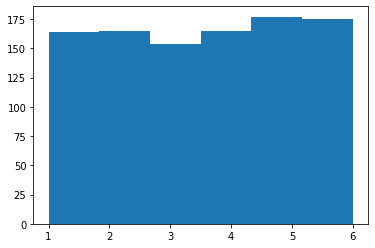

In [19]:
tmp = np.random.uniform(
    low=1,     # 最小
    high=7,    # 最大 + 1
    size=1000) # 乱数の数
x = [int(k) for k in tmp]
plt.hist(x, bins=6) # 結果は割愛

### 4.3.3 二項乱数(binomial random number)

(array([  1.,   0.,   1.,   0.,   0.,   2.,  10.,  10.,  17.,  26.,  40.,
         79., 118., 172., 225., 294., 377., 479., 607., 650., 720., 780.,
        840., 771., 724., 655., 580., 473., 385., 278., 236., 174., 112.,
         62.,  49.,  19.,  18.,   7.,   5.,   3.,   1.]),
 array([28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
        41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
        54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.,
        67., 68., 69.]),
 <a list of 41 Patch objects>)

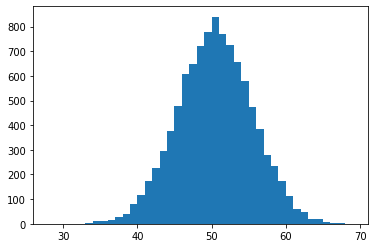

In [20]:
n = 100
p = 0.5
r = 10000
x = np.random.binomial(
# あるいは
#x = rng.binomial(
    n=n,    # 試行回数
    p=p,    # 確率
    size=r) # 乱数の数
plt.hist(x, bins=max(x) - min(x))

### 4.3.4 正規乱数(normal random numbers)

(array([  1.,   1.,   1.,   3.,   8.,  17.,  28.,  29.,  66.,  96., 123.,
        192., 219., 300., 378., 464., 520., 641., 682., 697., 705., 679.,
        675., 631., 612., 506., 450., 314., 298., 214., 151., 108.,  72.,
         44.,  23.,  24.,  12.,  11.,   3.,   2.]),
 array([30.89435153, 31.81096726, 32.727583  , 33.64419874, 34.56081447,
        35.47743021, 36.39404595, 37.31066168, 38.22727742, 39.14389316,
        40.0605089 , 40.97712463, 41.89374037, 42.81035611, 43.72697184,
        44.64358758, 45.56020332, 46.47681905, 47.39343479, 48.31005053,
        49.22666626, 50.143282  , 51.05989774, 51.97651347, 52.89312921,
        53.80974495, 54.72636068, 55.64297642, 56.55959216, 57.4762079 ,
        58.39282363, 59.30943937, 60.22605511, 61.14267084, 62.05928658,
        62.97590232, 63.89251805, 64.80913379, 65.72574953, 66.64236526,
        67.558981  ]),
 <a list of 40 Patch objects>)

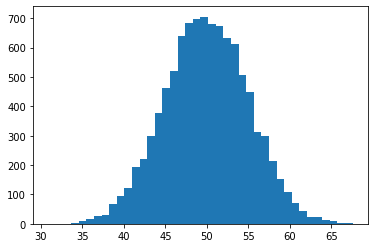

In [21]:
r = 10000
x = np.random.normal(
# あるいは
#x = rng.normal(
    loc=50,  # 平均
    scale=5, # 標準偏差
    size=r)  # 乱数の数
plt.hist(x, bins=40)

#### 4.3.4.1 補足：不偏性の具体例(Supplement: Specific examples of impartiality)

In [22]:
import numpy as np
import pandas as pd

def f(k):
    n = 10000
    tmp = [g(np.random.normal(size=k, scale=3)) for _ in range(n)]
    return pd.Series([k,
                      np.mean(tmp),                  # 平均
                      np.std(tmp, ddof=1) / n**0.5], # 標準誤差
                     index=['k', 'mean', 'se'])

In [23]:
def g(x):
    return np.var(x, ddof=1)
pd.Series([10, 20, 30]).apply(f)
#>       k      mean        se
#> 0  10.0  9.025140  0.042690
#> 1  20.0  9.022280  0.029525
#> 2  30.0  8.983166  0.023584

,k,mean,se
0,10.00,9.10,0.04
1,20.00,8.98,0.03
2,30.00,9.00,0.02


In [24]:
def g(x):
    return np.std(x, ddof=1)
pd.Series([10, 20, 30]).apply(f)
#>       k      mean        se
#> 0  10.0  2.923114  0.006983
#> 1  20.0  2.961450  0.004811
#> 2  30.0  2.968328  0.003977

,k,mean,se
0,10.00,2.93,0.01
1,20.00,2.96,0.00
2,30.00,2.97,0.00


In [25]:
from math import gamma

def g(x):
    n = len(x)
    return (np.std(x, ddof=1) *
            (np.sqrt((n - 1) / 2) *
             gamma((n - 1) / 2) /
             gamma(n / 2)))
pd.Series([10, 20, 30]).apply(f)
#>       k      mean        se
#> 0  10.0  3.005788  0.007121
#> 1  20.0  3.001857  0.004894
#> 2  30.0  2.995965  0.003925

,k,mean,se
0,10.00,2.99,0.01
1,20.00,2.99,0.00
2,30.00,3.00,0.00
